Automatically created module for IPython interactive environment


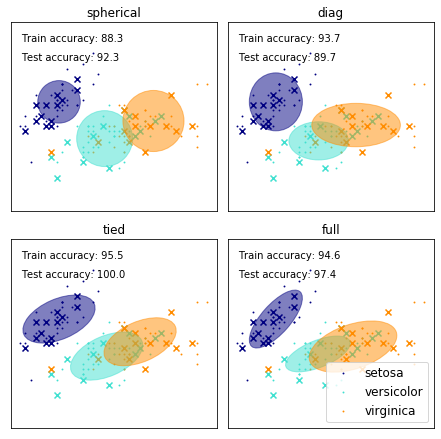

In [1]:
#######
#1st run of Expectation Maximization, iris
#######


# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
  for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [2]:
#######
#1st run of K-Means, iris
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_iris()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
features = dataset.data
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Feature Vectors: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

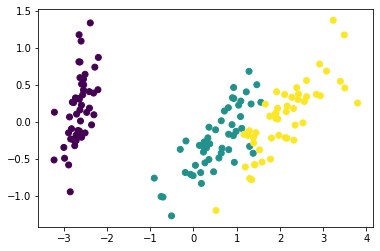

In [3]:
#######
#1st run of PCA, Iris
#######
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


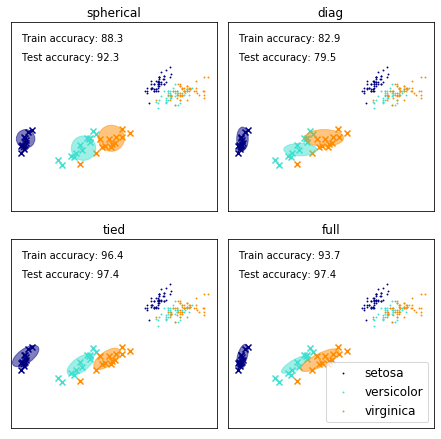

In [4]:
#######
#1st run of Expectation Maximization, iris, post PCA
#######


# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
  for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [5]:
#######
#1st run of K-Means, iris, post PCA
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_iris()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.625238

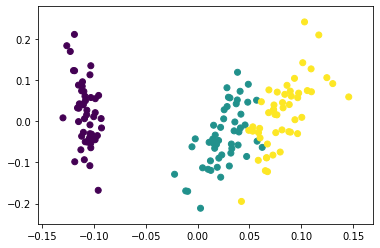

In [6]:
#######
#1st run of ICA, Iris
#######
from sklearn import decomposition
pca = decomposition.FastICA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


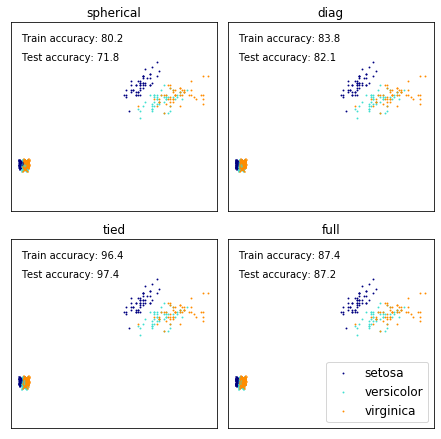

In [7]:
#######
#1st run of Expectation Maximization, iris, post ICA
#######


# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
  for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [8]:
#######
#1st run of K-Means, iris, post PCA
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_iris()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[-0.11208638  0.04115362]
 [-0.10428412 -0.04103773]
 [-0.11178932 -0.03649785]
 [-0.10296054 -0.06453147]
 [-0.11398561  0.04217639]
 [-0.10375782  0.1126545 ]
 [-0.11008336 -0.02702793]
 [-0.10696436  0.01561436]
 [-0.10383677 -0.10812695]
 [-0.10379028 -0.03040591]
 [-0.11096818  0.09576018]
 [-0.10374157 -0.00890215]
 [-0.10608177 -0.05095647]
 [-0.11841192 -0.0985288 ]
 [-0.12609226  0.18338906]
 [-0.11873161  0.21084563]
 [-0.11858483  0.1226319 ]
 [-0.11053071  0.04006129]
 [-0.10293031  0.13474622]
 [-0.11179569  0.07366846]
 [-0.09858294  0.05466996]
 [-0.10858277  0.06054229]
 [-0.12978054  0.00810948]
 [-0.09298461  0.0063259 ]
 [-0.09262131 -0.0163852 ]
 [-0.09662863 -0.03501536]
 [-0.10014626  0.01093534]
 [-0.10813765  0.04967035]
 [-0.11018716  0.04013086]
 [-0.10066906 -0.0439809 ]
 [-0.09876983 -0.04500367]
 [-0.1028851   0.057474  ]
 [-0.11963679  0.12296572]
 [-0.12271918  0.16943481]
 [-0.10223461 -0.03149824]
 [-0.11477013 -0.00097027]
 [-0.114825

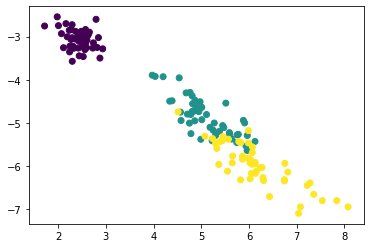

In [9]:
#######
#1st run of Randomized Projections, Iris
#######
from sklearn import random_projection
pca = random_projection.GaussianRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


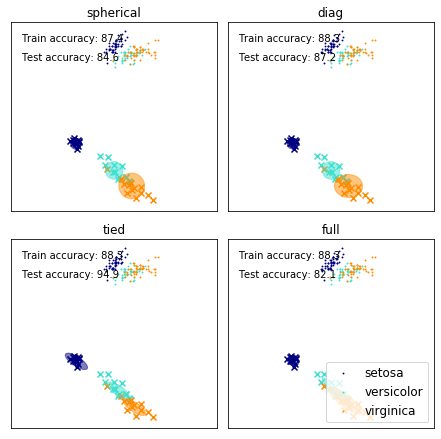

In [10]:
#######
#1st run of Expectation Maximization, iris, post randomized projections
#######


# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
  for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [11]:
#######
#1st run of K-Means, iris, post randomized projections
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_iris()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ 2.43747182 -3.07290858]
 [ 2.6541231  -2.89728497]
 [ 2.27018728 -2.83568143]
 [ 2.36213998 -2.87841585]
 [ 2.27086746 -3.06606789]
 [ 2.52549916 -3.4626865 ]
 [ 2.06870508 -2.93167107]
 [ 2.47869742 -3.06772084]
 [ 2.29240988 -2.72427389]
 [ 2.63335229 -2.93656817]
 [ 2.59525485 -3.25702584]
 [ 2.35331866 -3.05569242]
 [ 2.57312369 -2.83553611]
 [ 1.98067773 -2.54189315]
 [ 2.55963098 -3.30256434]
 [ 2.2954466  -3.57244109]
 [ 2.32259075 -3.27099786]
 [ 2.4304183  -3.10468215]
 [ 2.87526289 -3.49770422]
 [ 2.24549111 -3.22200813]
 [ 2.93236334 -3.28346635]
 [ 2.31698902 -3.23064709]
 [ 1.71574733 -2.75447807]
 [ 2.72559542 -3.26572656]
 [ 2.50549996 -3.1994589 ]
 [ 2.84363023 -3.02310459]
 [ 2.51531748 -3.17919014]
 [ 2.57625185 -3.15080604]
 [ 2.60407617 -3.07974927]
 [ 2.42236858 -2.97944791]
 [ 2.58897294 -2.9862886 ]
 [ 2.8168021  -3.25116916]
 [ 2.1119968  -3.2578401 ]
 [ 2.23982354 -3.35475199]
 [ 2.62629877 -2.96834174]
 [ 2.48361897 -2.87768515]
 [ 2.738956

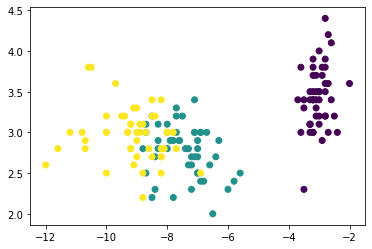

In [12]:
#######
#1st run of other kind of randomized projection, Iris
#######
from sklearn import random_projection
pca = random_projection.SparseRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


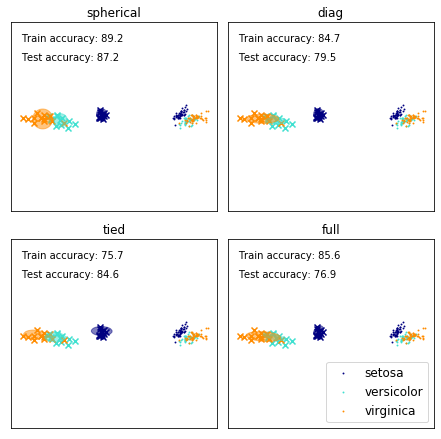

In [13]:
#######
#1st run of Expectation Maximization, iris, post other randomized projection
#######


# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
  for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [14]:
#######
#1st run of K-Means, iris, post other randomized projection
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_iris()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ -3.    3.5]
 [ -3.3   3. ]
 [ -2.8   3.2]
 [ -3.    3.1]
 [ -2.8   3.6]
 [ -3.2   3.9]
 [ -2.6   3.4]
 [ -3.1   3.4]
 [ -2.9   2.9]
 [ -3.3   3.1]
 [ -3.2   3.7]
 [ -3.    3.4]
 [ -3.2   3. ]
 [ -2.4   3. ]
 [ -3.    4. ]
 [ -2.8   4.4]
 [ -2.8   3.9]
 [ -3.    3.5]
 [ -3.6   3.8]
 [ -2.8   3.8]
 [ -3.7   3.4]
 [ -2.9   3.7]
 [ -2.    3.6]
 [ -3.5   3.3]
 [ -3.3   3.4]
 [ -3.6   3. ]
 [ -3.2   3.4]
 [ -3.2   3.5]
 [ -3.2   3.4]
 [ -3.1   3.2]
 [ -3.3   3.1]
 [ -3.5   3.4]
 [ -2.6   4.1]
 [ -2.7   4.2]
 [ -3.3   3.1]
 [ -3.    3.2]
 [ -3.3   3.5]
 [ -2.7   3.6]
 [ -2.7   3. ]
 [ -3.2   3.4]
 [ -2.8   3.5]
 [ -3.5   2.3]
 [ -2.5   3.2]
 [ -3.1   3.5]
 [ -3.2   3.8]
 [ -3.2   3. ]
 [ -2.9   3.8]
 [ -2.8   3.2]
 [ -3.1   3.7]
 [ -3.1   3.3]
 [ -8.5   3.2]
 [ -7.7   3.2]
 [ -8.7   3.1]
 [ -7.2   2.3]
 [ -8.3   2.8]
 [ -7.4   2.8]
 [ -7.7   3.3]
 [ -5.8   2.4]
 [ -8.3   2.9]
 [ -6.4   2.7]
 [ -6.5   2. ]
 [ -7.1   3. ]
 [ -7.8   2.2]
 [ -7.9   2.9]
 [ -6.3   2.9]
 [ -8.  

Automatically created module for IPython interactive environment


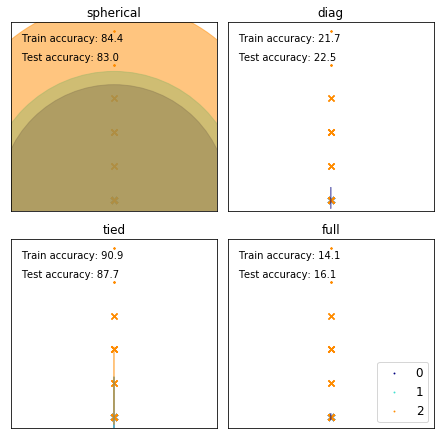

In [15]:
#######
#1st run of Expectation Maximization, Digits
#######

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [16]:
#######
#1st run of K-means, Digits
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_digits()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = dataset.data
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Labels: [0 1 2 ... 8 9 8]
Number of training samples:  1461
Number of test samples:  336
Feature vector dimensionality:  64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        33
           3       0.98      0.96      0.97        52
           4       1.00      0.95      0.98        21
           5       0.97      1.00      0.99        33
           6       1.00      0.97      0.99        38
           7       0.94      1.00      0.97        30
           8       1.00      0.94      0.97        32
           9       1.00      1.00      1.00        33

    accuracy                           0.98       336
   macro avg     

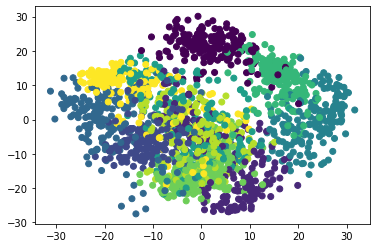

In [40]:
#######
#1st run of PCA, Digits
#######
iris = datasets.load_digits()
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment
60.68503350707372 train
52.863436123348016 test
61.876396128071484 train
56.38766519823789 test
62.99329858525689 train
56.167400881057276 test
64.25912137006702 train
58.14977973568281 test


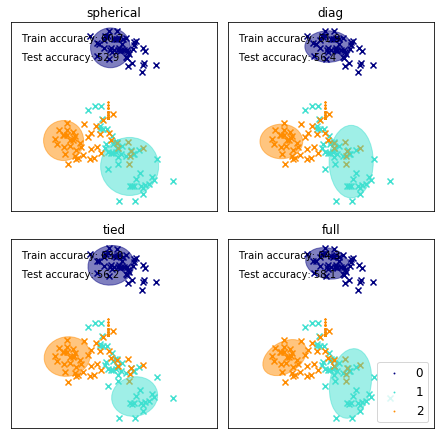

In [18]:
#######
#1st run of Expectation Maximization, Digits, post PCA
#######

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    print(train_accuracy, 'train')
    print(test_accuracy, 'test')
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [19]:
#######
#1st run of K-means, Digits, Post PCA
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_digits()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ -1.25946631  21.27488236]
 [  7.95761135 -20.76870081]
 [  6.99192245  -9.95598252]
 ...
 [ 10.80128415  -6.96025322]
 [ -4.87210142  12.42395839]
 [ -0.34438915   6.36554918]]
Labels: [0 1 2 ... 8 9 8]
Number of training samples:  1433
Number of test samples:  364
Feature vector dimensionality:  2
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.52      0.60      0.55        47
           2       0.52      0.71      0.60        34
           3       0.71      0.61      0.66        41
           4       0.71      0.88      0.79        25
           5       0.32      0.24      0.27        42
           6       0.78      0.82      0.80        39
           7       0.62      0.56      0.59        41
           8       0.33      0.29      0.31        35
           9       0.52      0.50      0.51        30

    accuracy                           0.59       364
   macro avg       0.58      0

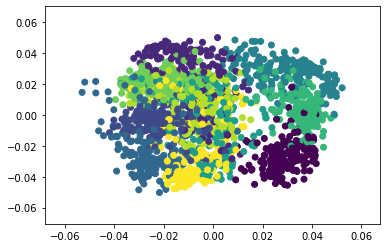

In [20]:
#######
#1st run of ICA, Digits
#######
from sklearn import decomposition
pca = decomposition.FastICA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


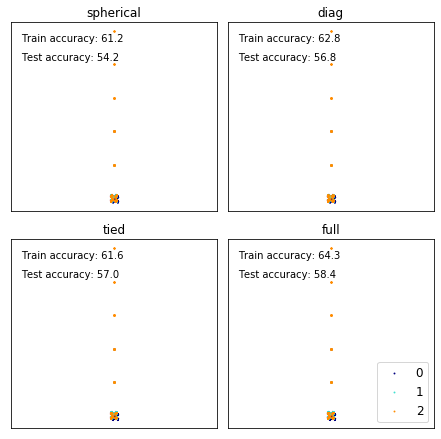

In [21]:
#######
#1st run of Expectation Maximization, Digits, post ICA
#######

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [22]:
#######
#1st run of K-Means, Digits, post ICA
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_digits()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ 0.02498408 -0.03033252]
 [-0.01567162  0.03766058]
 [-0.00339563  0.0218549 ]
 ...
 [ 0.00528822  0.02235359]
 [ 0.00922997 -0.02266255]
 [ 0.00751741 -0.00903681]]
Labels: [0 1 2 ... 8 9 8]
Number of training samples:  1450
Number of test samples:  347
Feature vector dimensionality:  2
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.41      0.65      0.50        43
           2       0.46      0.55      0.50        22
           3       0.66      0.66      0.66        29
           4       0.67      0.81      0.73        32
           5       0.46      0.29      0.36        45
           6       0.74      0.68      0.71        41
           7       0.70      0.79      0.74        29
           8       0.30      0.23      0.26        35
           9       0.65      0.46      0.54        37

    accuracy                           0.58       347
   macro avg       0.59      0.59      0.5

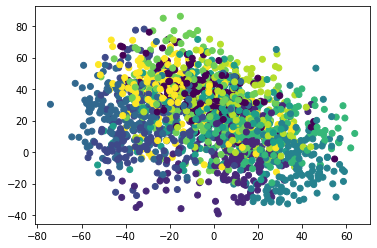

In [23]:
#######
#1st run of Randomized Projection, Digits
#######
from sklearn import random_projection
pca = random_projection.GaussianRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


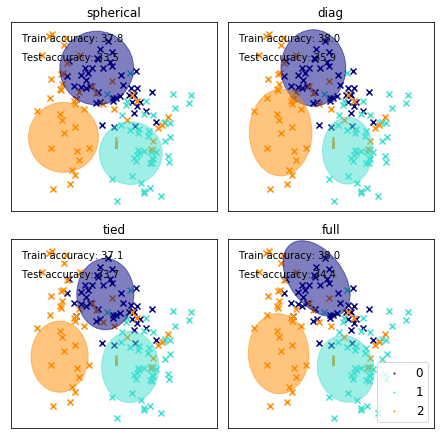

In [24]:
#######
#1st run of Expectation Maximization, Digits, post randomized projection
#######

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [25]:
#######
#1st run of K-Means, Digits, post randomized projection
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_digits()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[-20.07328903  35.12209434]
 [ 21.13994423  -6.24889994]
 [ 30.62140702  17.40533943]
 ...
 [ 43.89682637   3.29133623]
 [ -2.27804433  37.93051854]
 [  9.40699439  44.59582105]]
Labels: [0 1 2 ... 8 9 8]
Number of training samples:  1437
Number of test samples:  360
Feature vector dimensionality:  2
              precision    recall  f1-score   support

           0       0.29      0.64      0.40        39
           1       0.27      0.51      0.35        35
           2       0.27      0.45      0.34        29
           3       0.35      0.33      0.34        33
           4       0.59      0.51      0.55        37
           5       0.15      0.12      0.13        34
           6       0.30      0.17      0.22        46
           7       0.25      0.08      0.12        38
           8       0.33      0.15      0.20        34
           9       0.29      0.14      0.19        35

    accuracy                           0.31       360
   macro avg       0.31      0

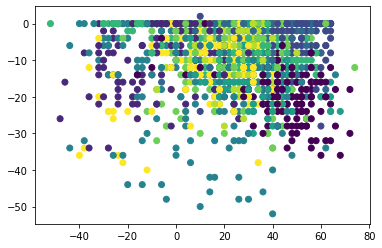

In [26]:
#######
#1st run of other randomized projection, Digits
#######
from sklearn import random_projection
pca = random_projection.SparseRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)
import pylab as pl
pl.scatter(X[:, 0], X[:, 1], c=iris.target)
pl.show()

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


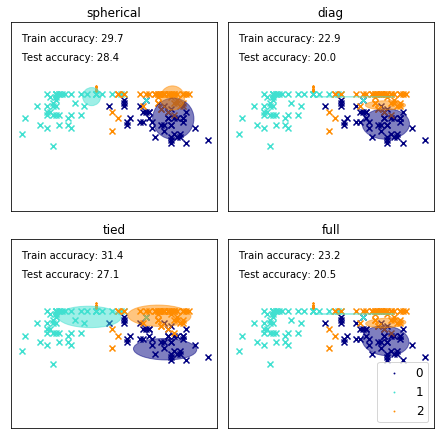

In [27]:
#######
#1st run of Expectation Maximization, Digits, post other randomized projection
#######

# Author: Ron Weiss <ronweiss@gmail.com>, Gael Varoquaux
# Modified by Thierry Guillemot <thierry.guillemot.work@gmail.com>
# License: BSD 3 clause

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

#iris = datasets.load_digits()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, iris.target)))


X_train = X[train_index]
y_train = iris.target[train_index]
X_test = X[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [28]:
#######
#1st run of K-Means, Digits, post other randomized projection
#######
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

# Import the modules
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC

#Load the dataset
dataset = datasets.load_digits()

#dataset = load_digits()
#print("Number of Samples: %d" %len(dataset.target))
#print("Output Categories: %s" %dataset.target_names)
#features = dataset.data
features = X
print("Feature Vectors: %s" %features)
labels = dataset.target
print("Labels: %s" %labels)

trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print("Number of training samples: ",features_train.shape[0])
print("Number of test samples: ",features_test.shape[0])
print("Feature vector dimensionality: ",features_train.shape[1])

# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print(metrics.classification_report(labels_test, labels_pred))
# print confusion matrix
print(metrics.confusion_matrix(labels_test, labels_pred))

Feature Vectors: [[ 44. -24.]
 [-10. -14.]
 [ 18.   0.]
 ...
 [ 12. -10.]
 [ 24. -24.]
 [ 32.   0.]]
Labels: [0 1 2 ... 8 9 8]
Number of training samples:  1440
Number of test samples:  357
Feature vector dimensionality:  2
              precision    recall  f1-score   support

           0       0.32      0.61      0.42        44
           1       0.29      0.36      0.32        39
           2       0.33      0.62      0.43        34
           3       0.22      0.24      0.23        34
           4       0.28      0.25      0.26        40
           5       0.36      0.24      0.29        37
           6       0.32      0.19      0.24        32
           7       0.23      0.10      0.14        30
           8       0.24      0.16      0.19        32
           9       0.45      0.14      0.22        35

    accuracy                           0.30       357
   macro avg       0.30      0.29      0.27       357
weighted avg       0.31      0.30      0.28       357

[[27  2  6  1  1 

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set s

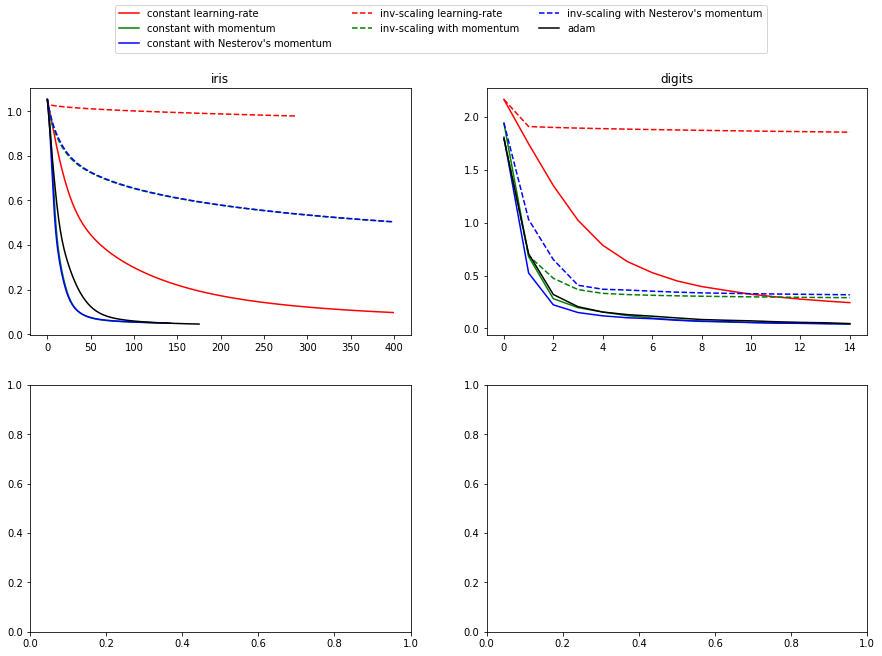

In [29]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(iris.data, iris.target),
             (digits.data, digits.target)]#,
             #datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             #datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.866667
Training set loss: 0.262934
training: constant with momentum
Training set score: 0.866667
Training set loss: 0.233253
training: constant with Nesterov's momentum
Training set score: 0.866667
Training set loss: 0.233791
training: inv-scaling learning-rate
Training set score: 0.333333
Training set loss: 1.066964
training: inv-scaling with momentum
Training set score: 0.853333
Training set loss: 0.782768
training: inv-scaling with Nesterov's momentum
Training set score: 0.853333
Training set loss: 0.784231
training: adam
Training set score: 0.866667
Training set loss: 0.233251

learning on dataset digits
training: constant learning-rate
Training set score: 0.288815
Training set loss: 2.169956
training: constant with momentum
Training set score: 0.313856
Training set loss: 1.802062
training: constant with Nesterov's momentum
Training set s

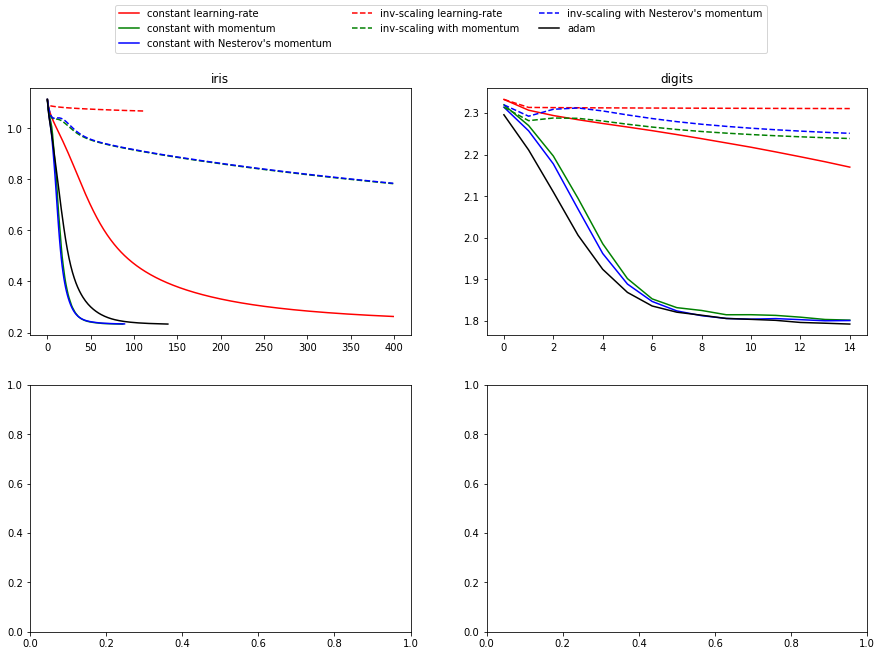

In [30]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

#######
#1st run of other randomized projection, Digits
#######
from sklearn import random_projection
pca = random_projection.SparseRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

pca = random_projection.SparseRandomProjection(n_components=2)
pca.fit(digits.data)
X_ = pca.transform(digits.data)

data_sets = [(X, iris.target),
             (X_, digits.target)]#,
             #datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             #datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.953333
Training set loss: 0.147661
training: constant with momentum
Training set score: 0.966667
Training set loss: 0.079918
training: constant with Nesterov's momentum
Training set score: 0.966667
Training set loss: 0.079955
training: inv-scaling learning-rate
Training set score: 0.340000
Training set loss: 1.054731
training: inv-scaling with momentum
Training set score: 0.833333
Training set loss: 0.733419
training: inv-scaling with Nesterov's momentum
Training set score: 0.833333
Training set loss: 0.735085
training: adam
Training set score: 0.960000
Training set loss: 0.076548

learning on dataset digits
training: constant learning-rate
Training set score: 0.228158
Training set loss: 2.159462
training: constant with momentum
Training set score: 0.288815
Training set loss: 1.890642
training: constant with Nesterov's momentum
Training set s

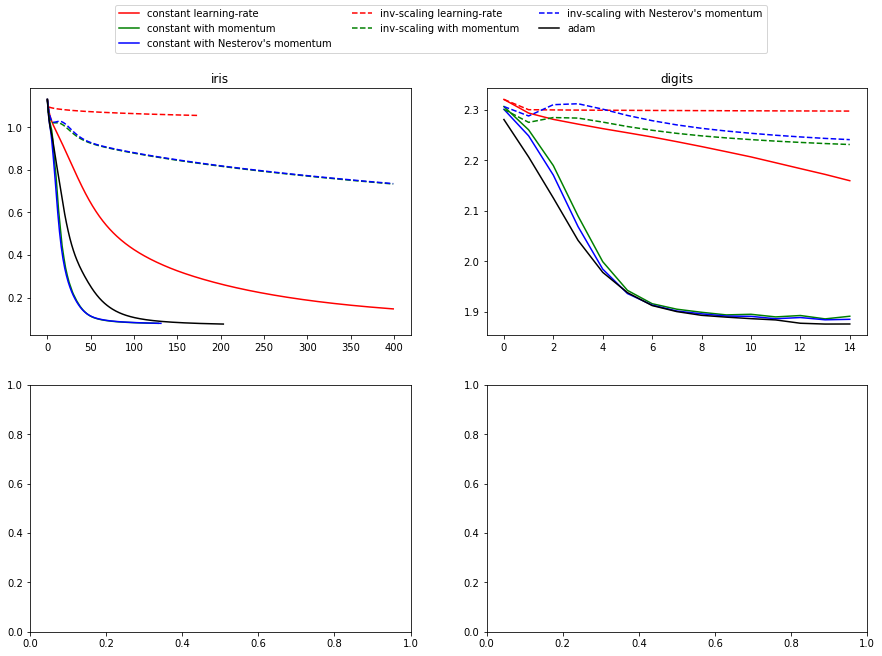

In [31]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

#######
#1st run of Randomized Projection, Digits
#######
from sklearn import random_projection
pca = random_projection.GaussianRandomProjection(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

pca = random_projection.GaussianRandomProjection(n_components=2)
pca.fit(digits.data)
X_ = pca.transform(digits.data)

data_sets = [(X, iris.target),
             (X_, digits.target)]#,
             #datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             #datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.973333
Training set loss: 0.143872
training: constant with momentum
Training set score: 0.973333
Training set loss: 0.076995
training: constant with Nesterov's momentum
Training set score: 0.973333
Training set loss: 0.077102
training: inv-scaling learning-rate
Training set score: 0.460000
Training set loss: 1.054012
training: inv-scaling with momentum
Training set score: 0.800000
Training set loss: 0.686713
training: inv-scaling with Nesterov's momentum
Training set score: 0.800000
Training set loss: 0.687883
training: adam
Training set score: 0.973333
Training set loss: 0.073799

learning on dataset digits
training: constant learning-rate
Training set score: 0.508625
Training set loss: 1.786289
training: constant with momentum
Training set score: 0.613244
Training set loss: 1.091593
training: constant with Nesterov's momentum
Training set s

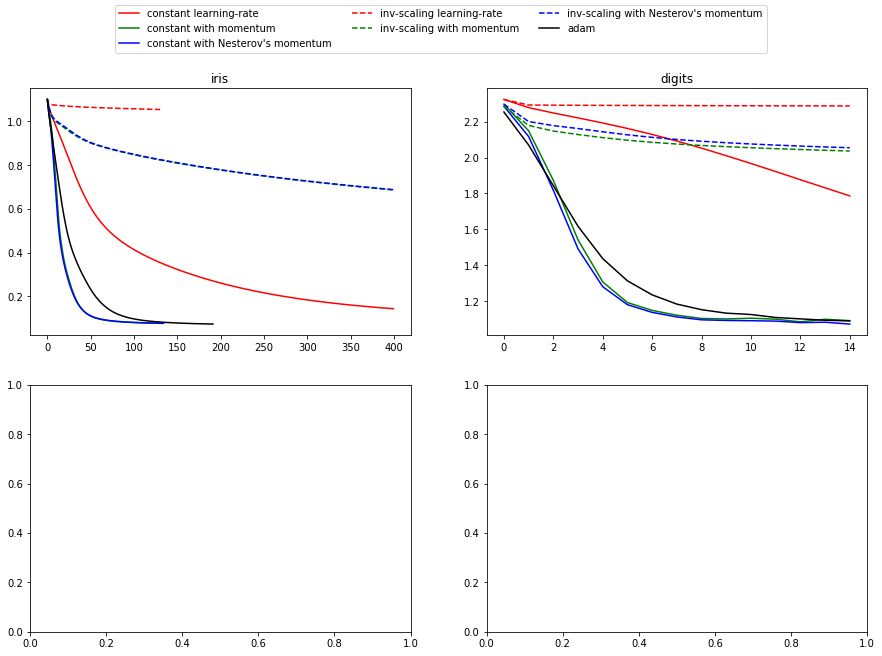

In [32]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

#######
#1st run of ICA, Digits
#######
from sklearn import decomposition
pca = decomposition.FastICA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

pca = decomposition.FastICA(n_components=2)
pca.fit(digits.data)
X_ = pca.transform(digits.data)

data_sets = [(X, iris.target),
             (X_, digits.target)]#,
             #datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             #datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

Automatically created module for IPython interactive environment

learning on dataset iris
training: constant learning-rate
Training set score: 0.966667
Training set loss: 0.143044
training: constant with momentum
Training set score: 0.973333
Training set loss: 0.077106
training: constant with Nesterov's momentum
Training set score: 0.973333
Training set loss: 0.077211
training: inv-scaling learning-rate
Training set score: 0.460000
Training set loss: 1.053495
training: inv-scaling with momentum
Training set score: 0.806667
Training set loss: 0.689555
training: inv-scaling with Nesterov's momentum
Training set score: 0.806667
Training set loss: 0.690693
training: adam
Training set score: 0.973333
Training set loss: 0.075012

learning on dataset digits
training: constant learning-rate
Training set score: 0.502504
Training set loss: 1.844713
training: constant with momentum
Training set score: 0.610462
Training set loss: 1.083028
training: constant with Nesterov's momentum
Training set s

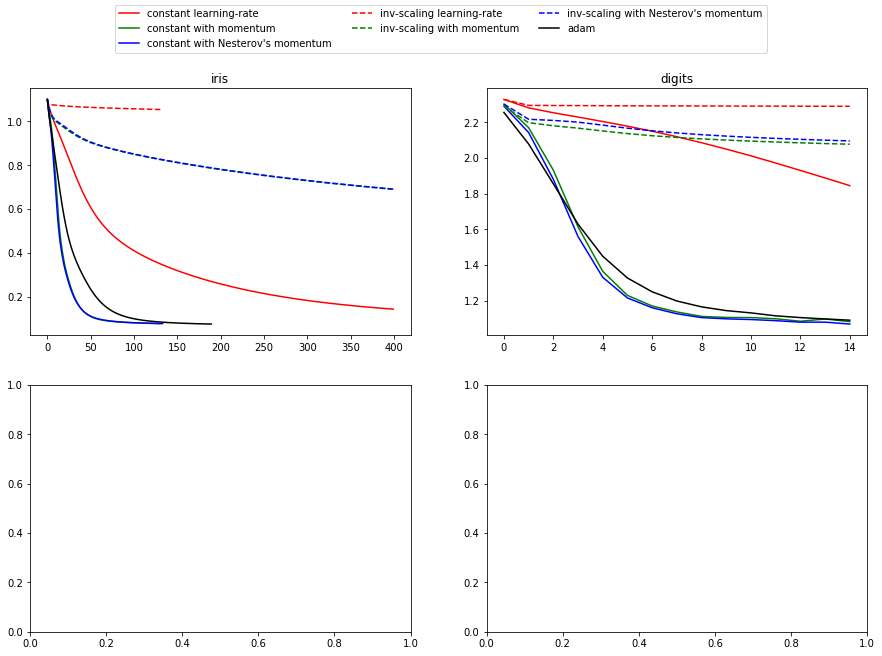

In [33]:
print(__doc__)

import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

#######
#1st run of PCA, Digits
#######
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)
X = pca.transform(iris.data)

pca = decomposition.PCA(n_components=2)
pca.fit(digits.data)
X_ = pca.transform(digits.data)

data_sets = [(X, iris.target),
             (X_, digits.target)]#,
             #datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
             #datasets.make_moons(noise=0.3, random_state=0)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
                                                    'circles', 'moons']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [0]:
a